In [ ]:
print(df)

In [97]:
import pandas as pd

df = pd.read_csv('dataset.csv')
df = df.loc[df['left_valid']==1]
import numpy as np
import cv2 as cv
import os

current_path = os.getcwd()
data_path = os.path.join(current_path,'train_set_area5_ir')

# 创建一个空列表，用于存储图像和标签的元组
data_set = []
# 遍历每张图像和对应的标签，组成元组并添加到列表中
for i in range(len(df)):  # num_samples 表示样本数量
    data = df.iloc[i,:].tolist()
    ##读取文件
    image = cv.imread(os.path.join(data_path,data[0]))
    data_set.append((image, int(data[1])))

# 将 train_set 转换为数组，方便后续处理
data_set = np.array(data_set)

C:\Users\Guanyu Zhu\AppData\Local\Temp\ipykernel_23088\2846499095.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_set = np.array(data_set)


In [103]:
import numpy as np

# 假设 train_set 包含了图像和标签的元组列表
# train_set 是一个数组，每个元素都是一个包含图像张量和标签的元组

# 打乱数据集
np.random.shuffle(data_set)


# 计算划分的索引位置
split_idx = int(0.8 * len(data_set))  # 使用80%作为训练集

# 划分数据集
train_data = data_set[:split_idx]
test_data = data_set[split_idx:]

# 将图像和标签分开
train_images = np.array([item[0] for item in train_data])/255
train_labels = np.array([item[1] for item in train_data])
test_images = np.array([item[0] for item in test_data])/255
test_labels = np.array([item[1] for item in test_data])

# 打印训练集和测试集的大小
print("训练集大小：", len(train_data))
print("测试集大小：", len(test_data))


训练集大小： 270
测试集大小： 68


In [104]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 构建卷积神经网络
def build_cnn(input_shape, num_classes):
    model = models.Sequential()

    # 添加卷积层和池化层
    model.add(layers.Conv2D(2, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(4, (3, 3), activation='relu'))

    # 添加全连接层
    model.add(layers.Flatten())
    model.add(layers.Dense(4, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# 设置输入图像的大小和类别数
input_shape = (120,120, 3) 
num_classes = 2

# 构建模型
model = build_cnn(input_shape, num_classes)

# 编译模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 打印模型概述
model.summary()


train_labels_update = []
for i in range(len(train_labels)):
    train_labels_update.append((train_labels[i],1-train_labels[i]))
train_labels_update = np.array(train_labels_update)

test_labels_update = []
for i in range(len(test_labels)):
    test_labels_update.append((test_labels[i],1-test_labels[i]))
test_labels_update = np.array(test_labels_update)

# 训练模型
history = model.fit(train_images, train_labels_update, epochs=20, batch_size=64, validation_split=0.2)

# 评估模型
test_loss, test_acc = model.evaluate(test_images, test_labels_update)
print(f"测试集准确率：{test_acc}")


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 118, 118, 2)       56        
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 59, 59, 2)        0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 57, 57, 4)         76        
                                                                 
 flatten_26 (Flatten)        (None, 12996)             0         
                                                                 
 dense_52 (Dense)            (None, 4)                 51988     
                                                                 
 dense_53 (Dense)            (None, 2)                 10        
                                                     

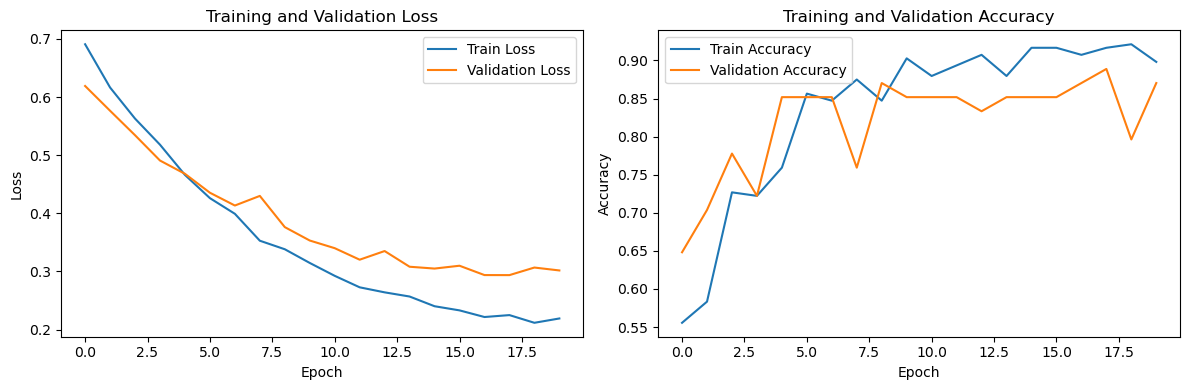

In [105]:
import matplotlib.pyplot as plt

# 训练情况可视化

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 绘制训练准确率和验证准确率
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [106]:
##打包模型

# 保存模型权重
model.save_weights('model_weights.h5')

# 保存整个模型
model.save('complete_model.h5')


In [96]:
##加载模型
from tensorflow.keras.models import load_model

# 加载整个模型
loaded_model = load_model('complete_model.h5')

# 加载模型权重
loaded_model.load_weights('model_weights.h5')




NameError: name 'model_from_json' is not defined